<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%2012/Week%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import PIL

# Teori

## Konsep FeatureMatching

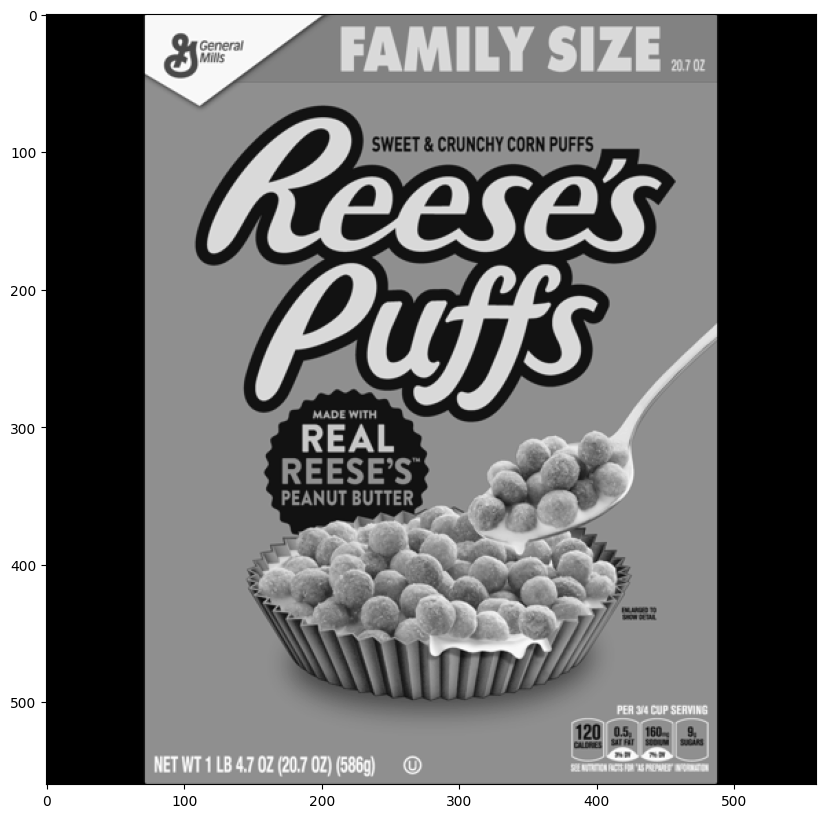

In [71]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

reeses = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/reeses_puffs.png', 0)
display(reeses)

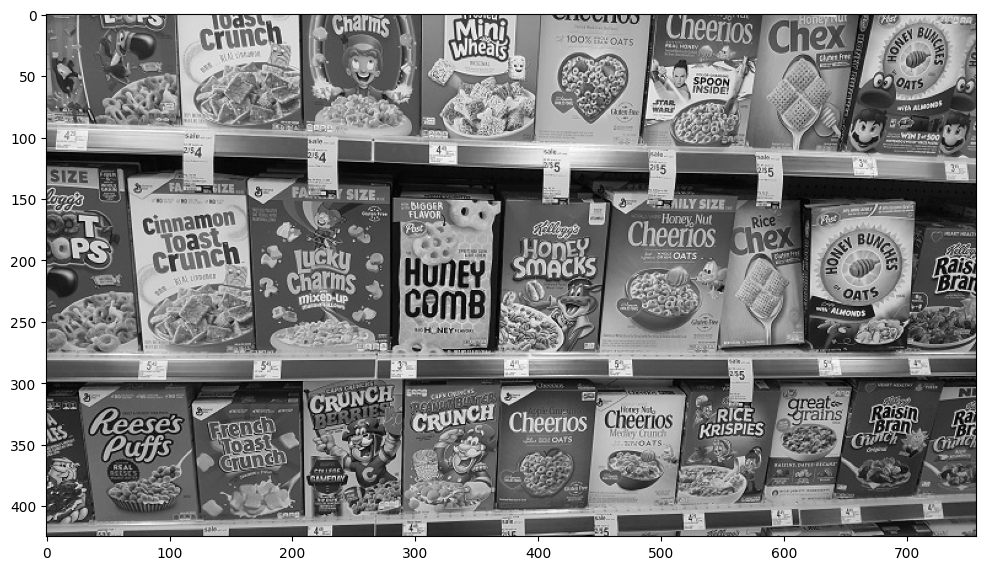

In [72]:
cereals = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/many_cereals.jpg', 0)
display(cereals)

In [73]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

71.0

In [74]:
len(matches)

139

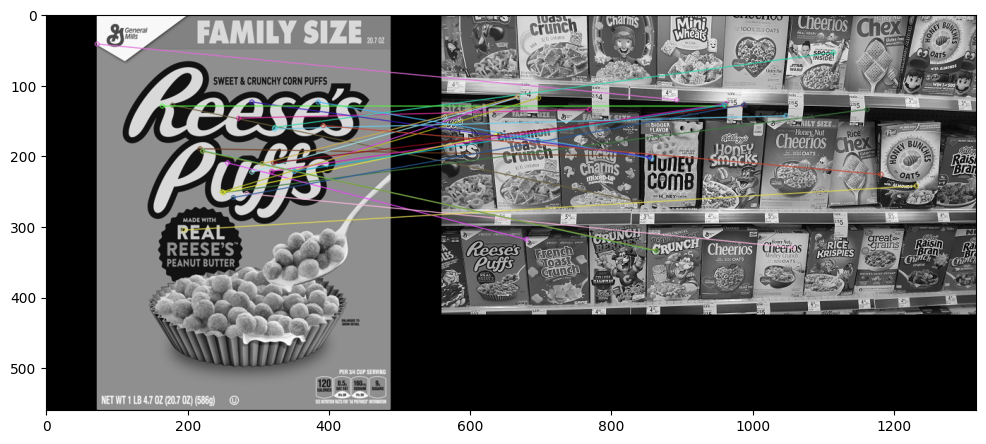

In [75]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_match)

In [76]:
# !pip install opencv-contrib-python==4.4.0.46

In [77]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good=[]

for match1, match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [78]:
len(matches)

1501

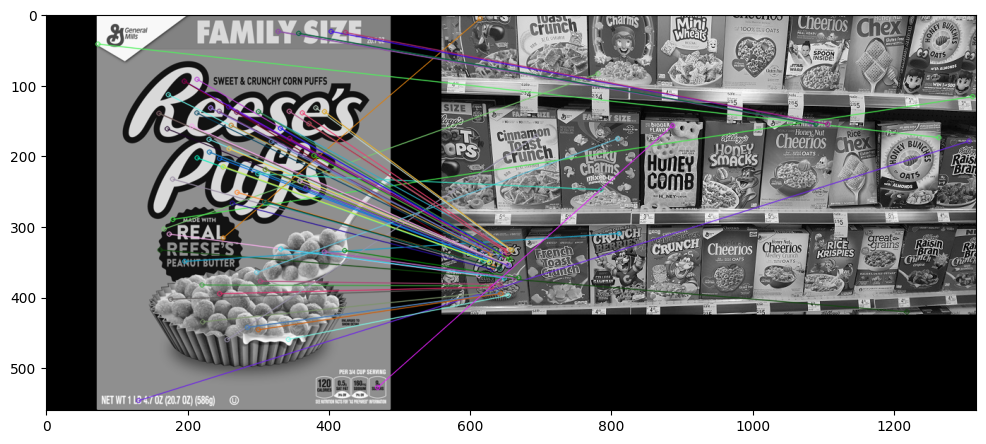

In [79]:
sift_matches= cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

## Konsep FaceDetection

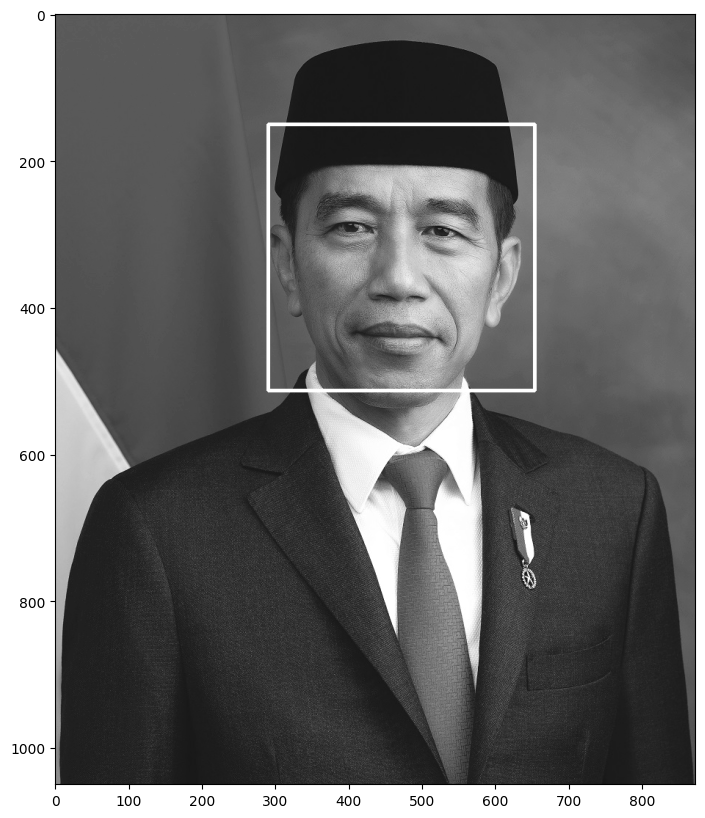

In [80]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

# Tugas Praktikum

## Import Gambar

In [81]:
jokowi_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/jokowi.jpg') 
jokowi = jokowi_original.copy()

kartini_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/kartini.jpg')
kartini_rgb = cv.cvtColor(kartini_original, cv.COLOR_BGR2RGB)
kartini = kartini_rgb.copy()

kucing_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/mycat.jpg',0)
kucing_rgb = cv.cvtColor(kucing_original, cv.COLOR_BGR2RGB)
kucing = kucing_rgb.copy()

mask_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/mask.png',0)
mask_rgb = cv.cvtColor(mask_original, cv.COLOR_BGR2RGB)
mask = mask_rgb.copy()

mjordan_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan_original, cv.COLOR_BGR2RGB)
mjordan = mjordan_rgb.copy()

solvayconf_original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/solvayconf.jpg')
solvayconf_rgb = cv.cvtColor(solvayconf_original, cv.COLOR_BGR2RGB)
solvayconf = solvayconf_rgb.copy()

##Nomor 2

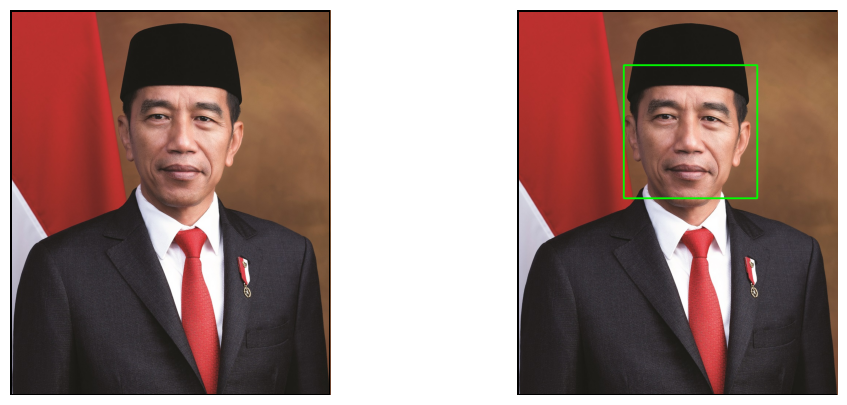

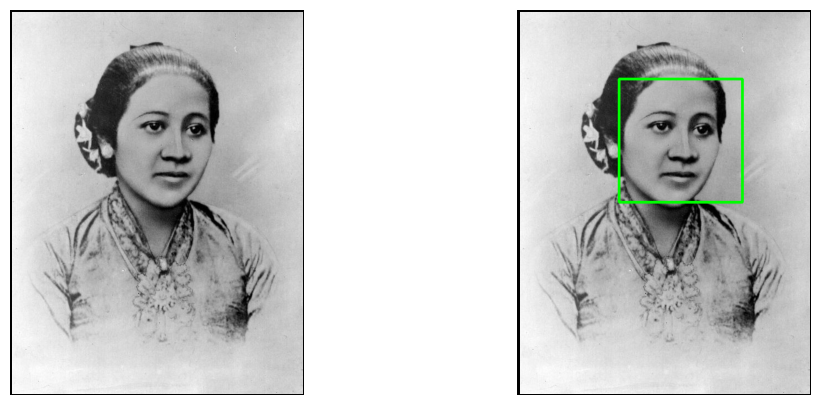

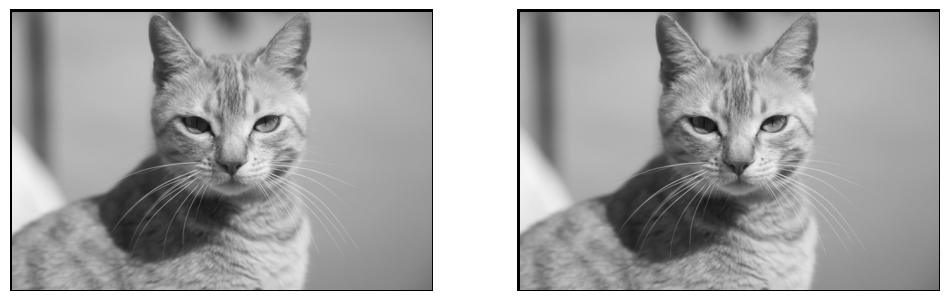

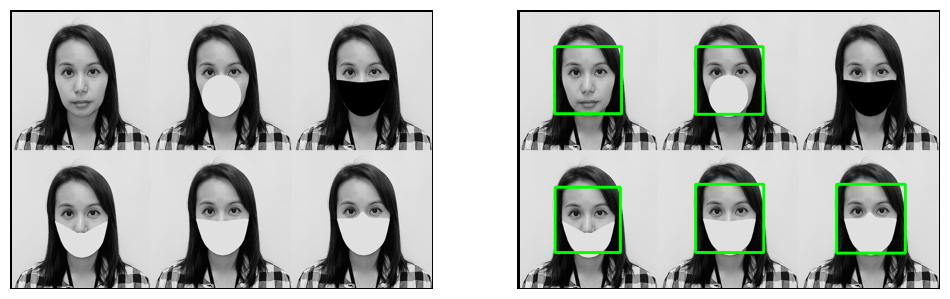

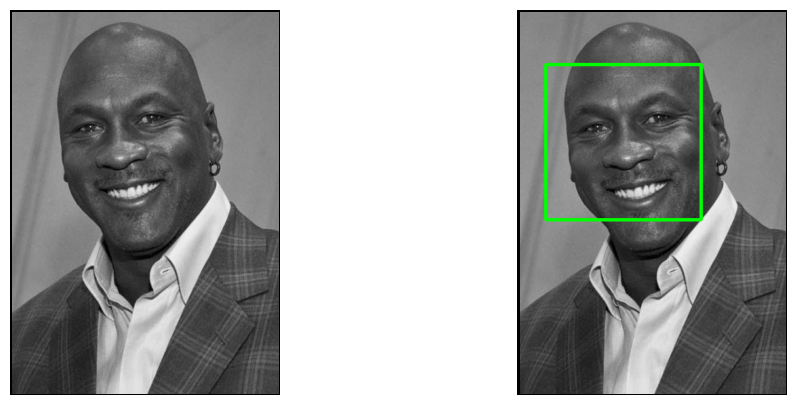

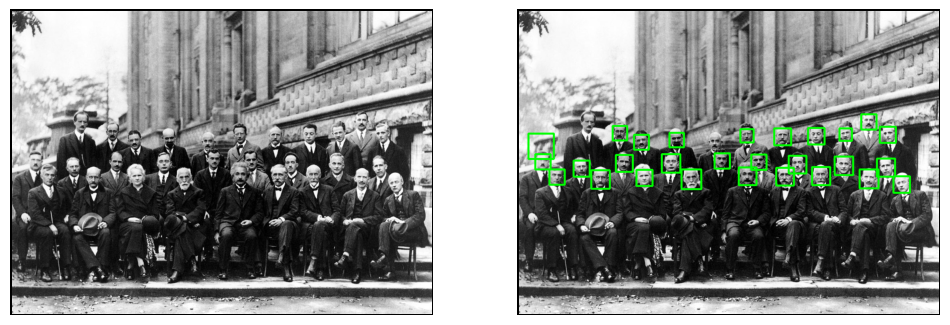

In [82]:
def plot_face_detection(image, image_original):
    cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
    roi_wajah = cascade_wajah.detectMultiScale(image) 

    for (x, y, w, h) in roi_wajah: 
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3) 

    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
    plt.gca().add_patch(plt.Rectangle((0, 0), image_original.shape[1], image_original.shape[0], fill=False, edgecolor='black', linewidth=2))
    plt.axis('off')
    ax[0].imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
    plt.gca().add_patch(plt.Rectangle((0, 0), image_original.shape[1], image_original.shape[0], fill=False, edgecolor='black', linewidth=2))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.gca().add_patch(plt.Rectangle((0, 0), image.shape[1], image.shape[0], fill=False, edgecolor='black', linewidth=2))
    ax[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.gca().add_patch(plt.Rectangle((0, 0), image.shape[1], image.shape[0], fill=False, edgecolor='black', linewidth=2))
    plt.axis('off')
    plt.show()
  
  # Tampilkan Gambar
plot_face_detection(jokowi, jokowi_original)
print("\n")
plot_face_detection(kartini, kartini_original)
print("\n")
plot_face_detection(kucing, kucing_original)
print("\n")
plot_face_detection(mask, mask_original)
print("\n")
plot_face_detection(mjordan, mjordan_original)
print("\n")
plot_face_detection(solvayconf, solvayconf_original)

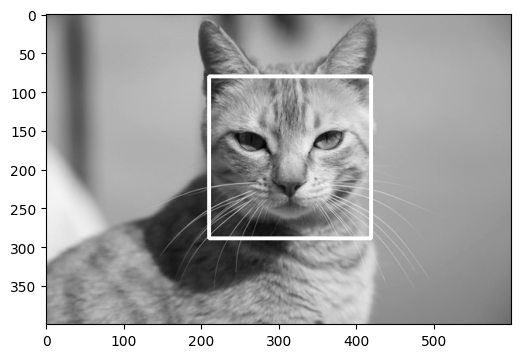

In [83]:
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml')

kucing2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/mycat.jpg',0)

roi_kucing = cascade_kucing.detectMultiScale(kucing2)
for (x,y,w,h) in roi_kucing: 
  cv.rectangle(kucing2,(x,y),(x+w,y+h),(255,255,255),3) 
plt.figure(figsize = (6,6))

plt.imshow(kucing2, cmap='gray')
plt.show()

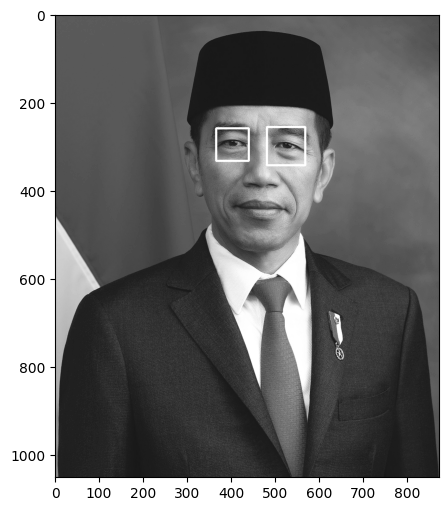

In [84]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_eye.xml')

jokowi2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/jokowi.jpg',0)

roi_eye = cascade_mata.detectMultiScale(jokowi2)
for (x,y,w,h) in roi_eye: 
  cv.rectangle(jokowi2,(x,y),(x+w,y+h),(255,255,255),3) 
plt.figure(figsize = (6,6))

plt.imshow(jokowi2, cmap='gray')
plt.show()

In [85]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

<IPython.core.display.Javascript object>

(360, 640)
Saved to photo.jpg


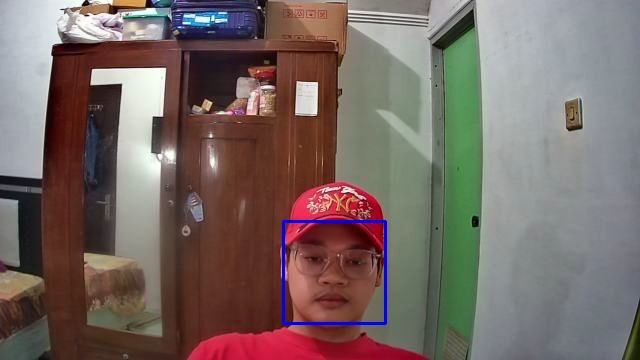

In [94]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

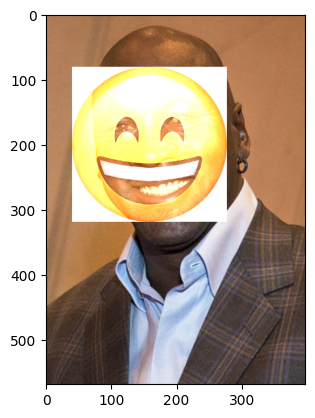

In [112]:
cascade_mjordan = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_frontalface_default.xml')

mjordan2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/mjordan.jpg')
smile = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/smile.png', cv.IMREAD_COLOR)

mjordan2_gray = cv.cvtColor(mjordan2, cv.COLOR_BGR2GRAY)

faces = cascade_mjordan.detectMultiScale(mjordan2_gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    smile_resized = cv.resize(smile, (w, h))
    mjordan2[y:y+h, x:x+w] = cv.addWeighted(mjordan2[y:y+h, x:x+w], 1, smile_resized, 1, 0)
    break

plt.imshow(cv.cvtColor(mjordan2, cv.COLOR_BGR2RGB))
plt.show()

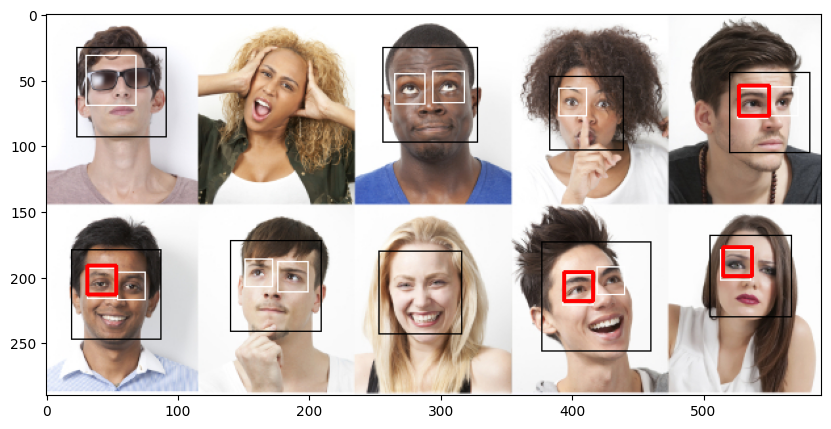

In [153]:
bounding_box = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/facedet/people.jpg')
bounding_box_gray = cv.cvtColor(bounding_box, cv.COLOR_BGR2GRAY)

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_eye.xml')
cascade_mata_kanan = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/haarcascades/haarcascade_righteye_2splits.xml')

roi_wajah = cascade_wajah.detectMultiScale(bounding_box_gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in roi_wajah:
    cv.rectangle(bounding_box, (x, y), (x+w, y+h), (0, 0, 0), 1)
    roi_gray = bounding_box_gray[y:y+h, x:x+w]
    roi_color = bounding_box[y:y+h, x:x+w]
    
    mata = cascade_mata.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in mata:
        cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 1)

    mata_kanan = cascade_mata_kanan.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in mata_kanan:
        cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(bounding_box, cv.COLOR_BGR2RGB))
plt.show()